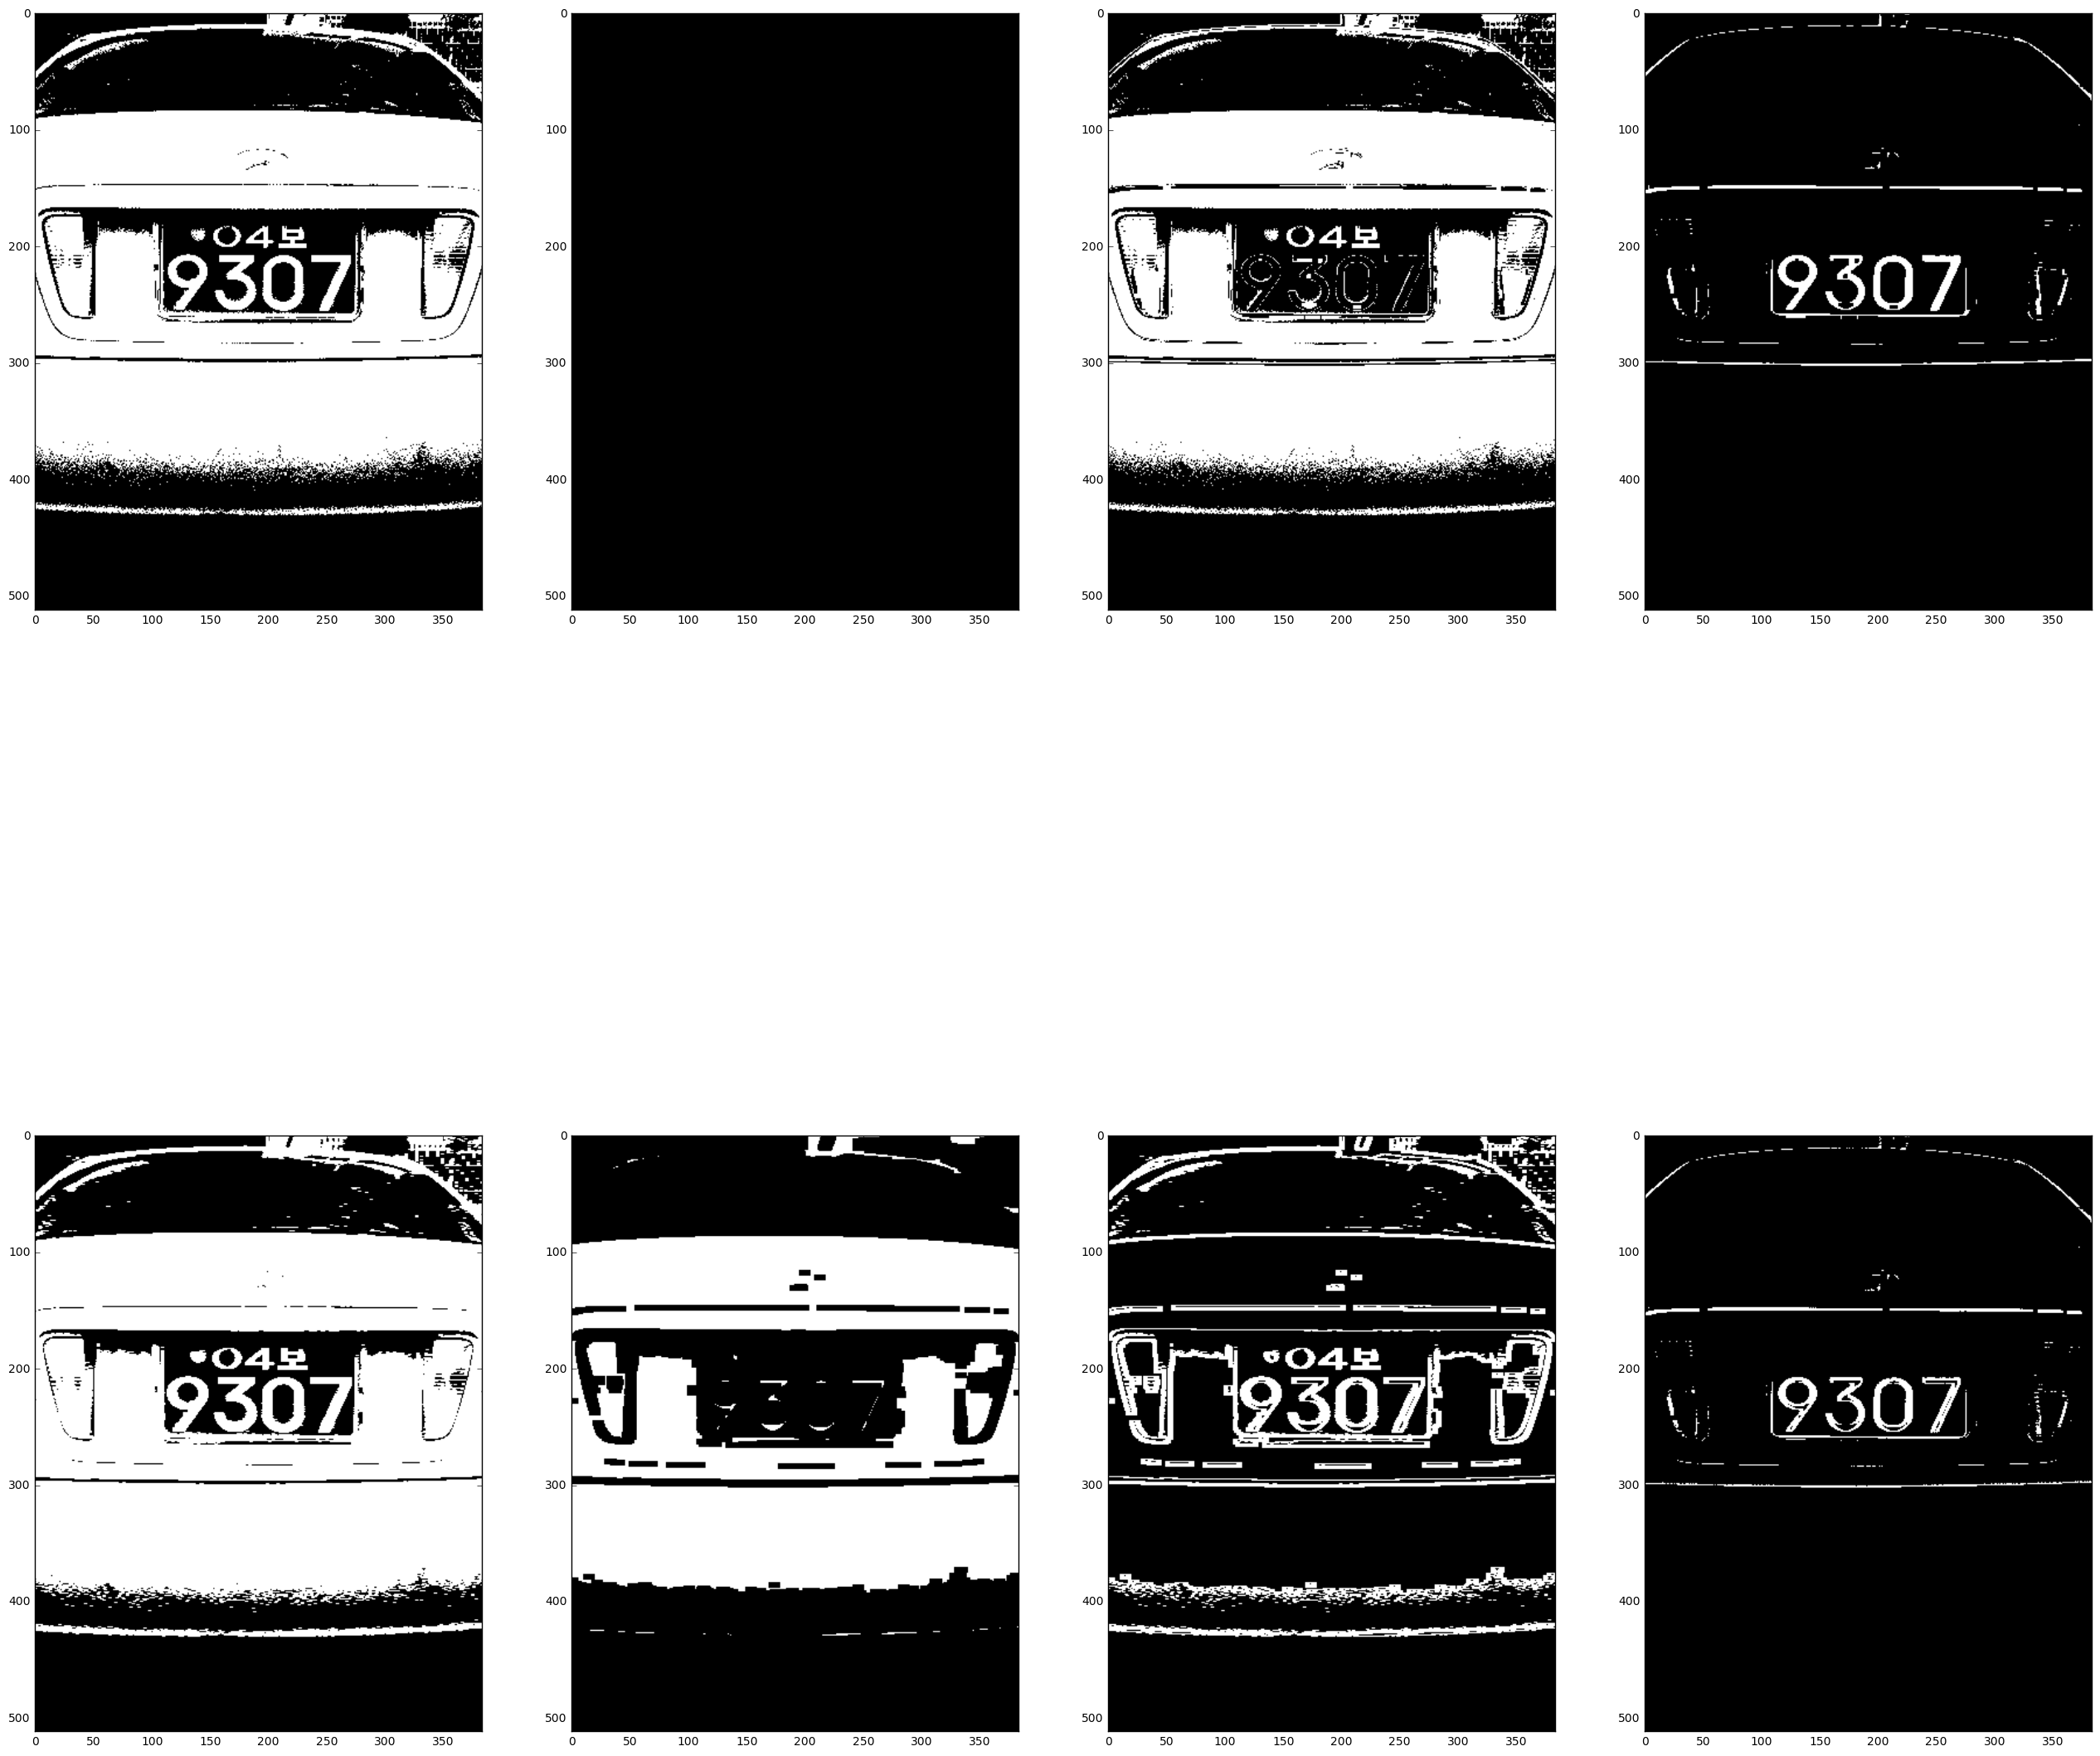

In [6]:
import cv2
import numpy as np
from PIL import Image
from pylab import *

img=cv2.imread('car1.jpg',0)
row,col=img.shape

imResize=res = cv2.resize(img,(int(col/4), int(row/4)), interpolation = cv2.INTER_CUBIC)

ret,thresh1 = cv2.threshold(imResize,63,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(imResize,127,255,cv2.THRESH_BINARY)
ret,thresh3 = cv2.threshold(imResize,159,255,cv2.THRESH_BINARY)
ret,thresh4 = cv2.threshold(imResize,191,255,cv2.THRESH_BINARY)

#img_biner=cv2.adaptiveThreshold(imResize,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#            cv2.THRESH_BINARY,11,2)

thresh1 = cv2.equalizeHist(thresh1)

#kernel 1 is for long object
kernel1=np.ones((3,2),np.uint8)
kernel2=np.ones((1,17),np.uint8)
kernel3=np.ones((10,1),np.uint8)
kernel4=np.ones((7,7),np.uint8)

kerneldilate1=np.ones((1,3),np.uint8)
kerneldilate2=np.ones((3,3),np.uint8)
kerneldilate3=np.ones((3,1),np.uint8)
kerneldilate4=np.ones((1,5),np.uint8)

kernelerode1=np.ones((2,5),np.uint8)
kernelerode2=np.ones((3,2),np.uint8)
kernelerode3=np.ones((1,7),np.uint8)

d1=cv2.dilate(thresh1,kerneldilate1,iterations=1)
##d2=cv2.dilate(thresh1,kerneldilate2,iterations=1)
##d3=cv2.dilate(thresh1,kerneldilate3,iterations=1)
##d4=cv2.dilate(thresh1,kerneldilate4,iterations=1)
e1=cv2.erode(d1,kernelerode1,iterations=2)
e1=cv2.erode(e1,kernelerode2,iterations=1)
#e2=cv2.erode(thresh1,kernelerode2,iterations=1)
#e3=cv2.erode(thresh1,kernelerode3,iterations=1)
#opening1=cv2.morphologyEx(thresh1,cv2.MORPH_OPEN,kernel1)
opening2=cv2.morphologyEx(thresh1,cv2.MORPH_CLOSE,kernel2)
opening3=cv2.morphologyEx(thresh1,cv2.MORPH_CLOSE,kernel3)
opening4=cv2.morphologyEx(thresh1,cv2.MORPH_CLOSE,kernel4)

try1=cv2.morphologyEx(thresh1,cv2.MORPH_OPEN,kernel1)
try2=cv2.morphologyEx(thresh2,cv2.MORPH_OPEN,kernel1)
try3=cv2.morphologyEx(thresh3,cv2.MORPH_OPEN,kernel1)
try4=cv2.morphologyEx(thresh3,cv2.MORPH_OPEN,kernel1)

d1sube1=d1-e1
t2andsub1=cv2.bitwise_and(thresh2,d1sube1)

kernelclosing1=np.ones((3,3),np.uint8)
close1=cv2.morphologyEx(t2andsub1,cv2.MORPH_CLOSE,kernelclosing1)

kernelerode=np.ones((1,2),np.uint8)
erode=cv2.erode(close1,kernelerode,iterations=1)

temp=cv2.bitwise_not(close1)
t1xorc1=cv2.bitwise_and(thresh1,temp)


t1subd1=thresh1-d1
# thresh1 XOR opening2
op2=cv2.bitwise_not(opening2)
t1xorop2=cv2.bitwise_and(thresh1,op2)

op3=cv2.bitwise_not(opening3)
t1xorop3=cv2.bitwise_and(thresh1,op3)

# t1xorop2 OR t1xorop3
t1op2ORt1op3=cv2.bitwise_or(t1xorop2,t1xorop3)

#opening 2 AND opening3
op2ANDop3=cv2.bitwise_and(opening2,opening3)

#thresh1 sub opening2
t1subop2=cv2.subtract(thresh1,opening2)
erode=cv2.erode(t1subop2,kernel1,iterations=1)
opening1=cv2.morphologyEx(t1subop2,cv2.MORPH_OPEN,kernel1)

fig, axs = subplots(2, 4, figsize=(32, 32))
axs[0][0].imshow(thresh1)
axs[0][0].axis('on')
axs[0][1].imshow(erode)
axs[0][1].axis('on')
axs[0][2].imshow(t1xorc1)
axs[0][2].axis('on')
axs[0][3].imshow(close1)
axs[0][3].axis('on')
axs[1][0].imshow(d1)
axs[1][0].axis('on')
axs[1][1].imshow(e1)
axs[1][1].axis('on')
axs[1][2].imshow(d1sube1)
axs[1][2].axis('on')
axs[1][3].imshow(t2andsub1)
axs[1][3].axis('on')
gray()
show()          

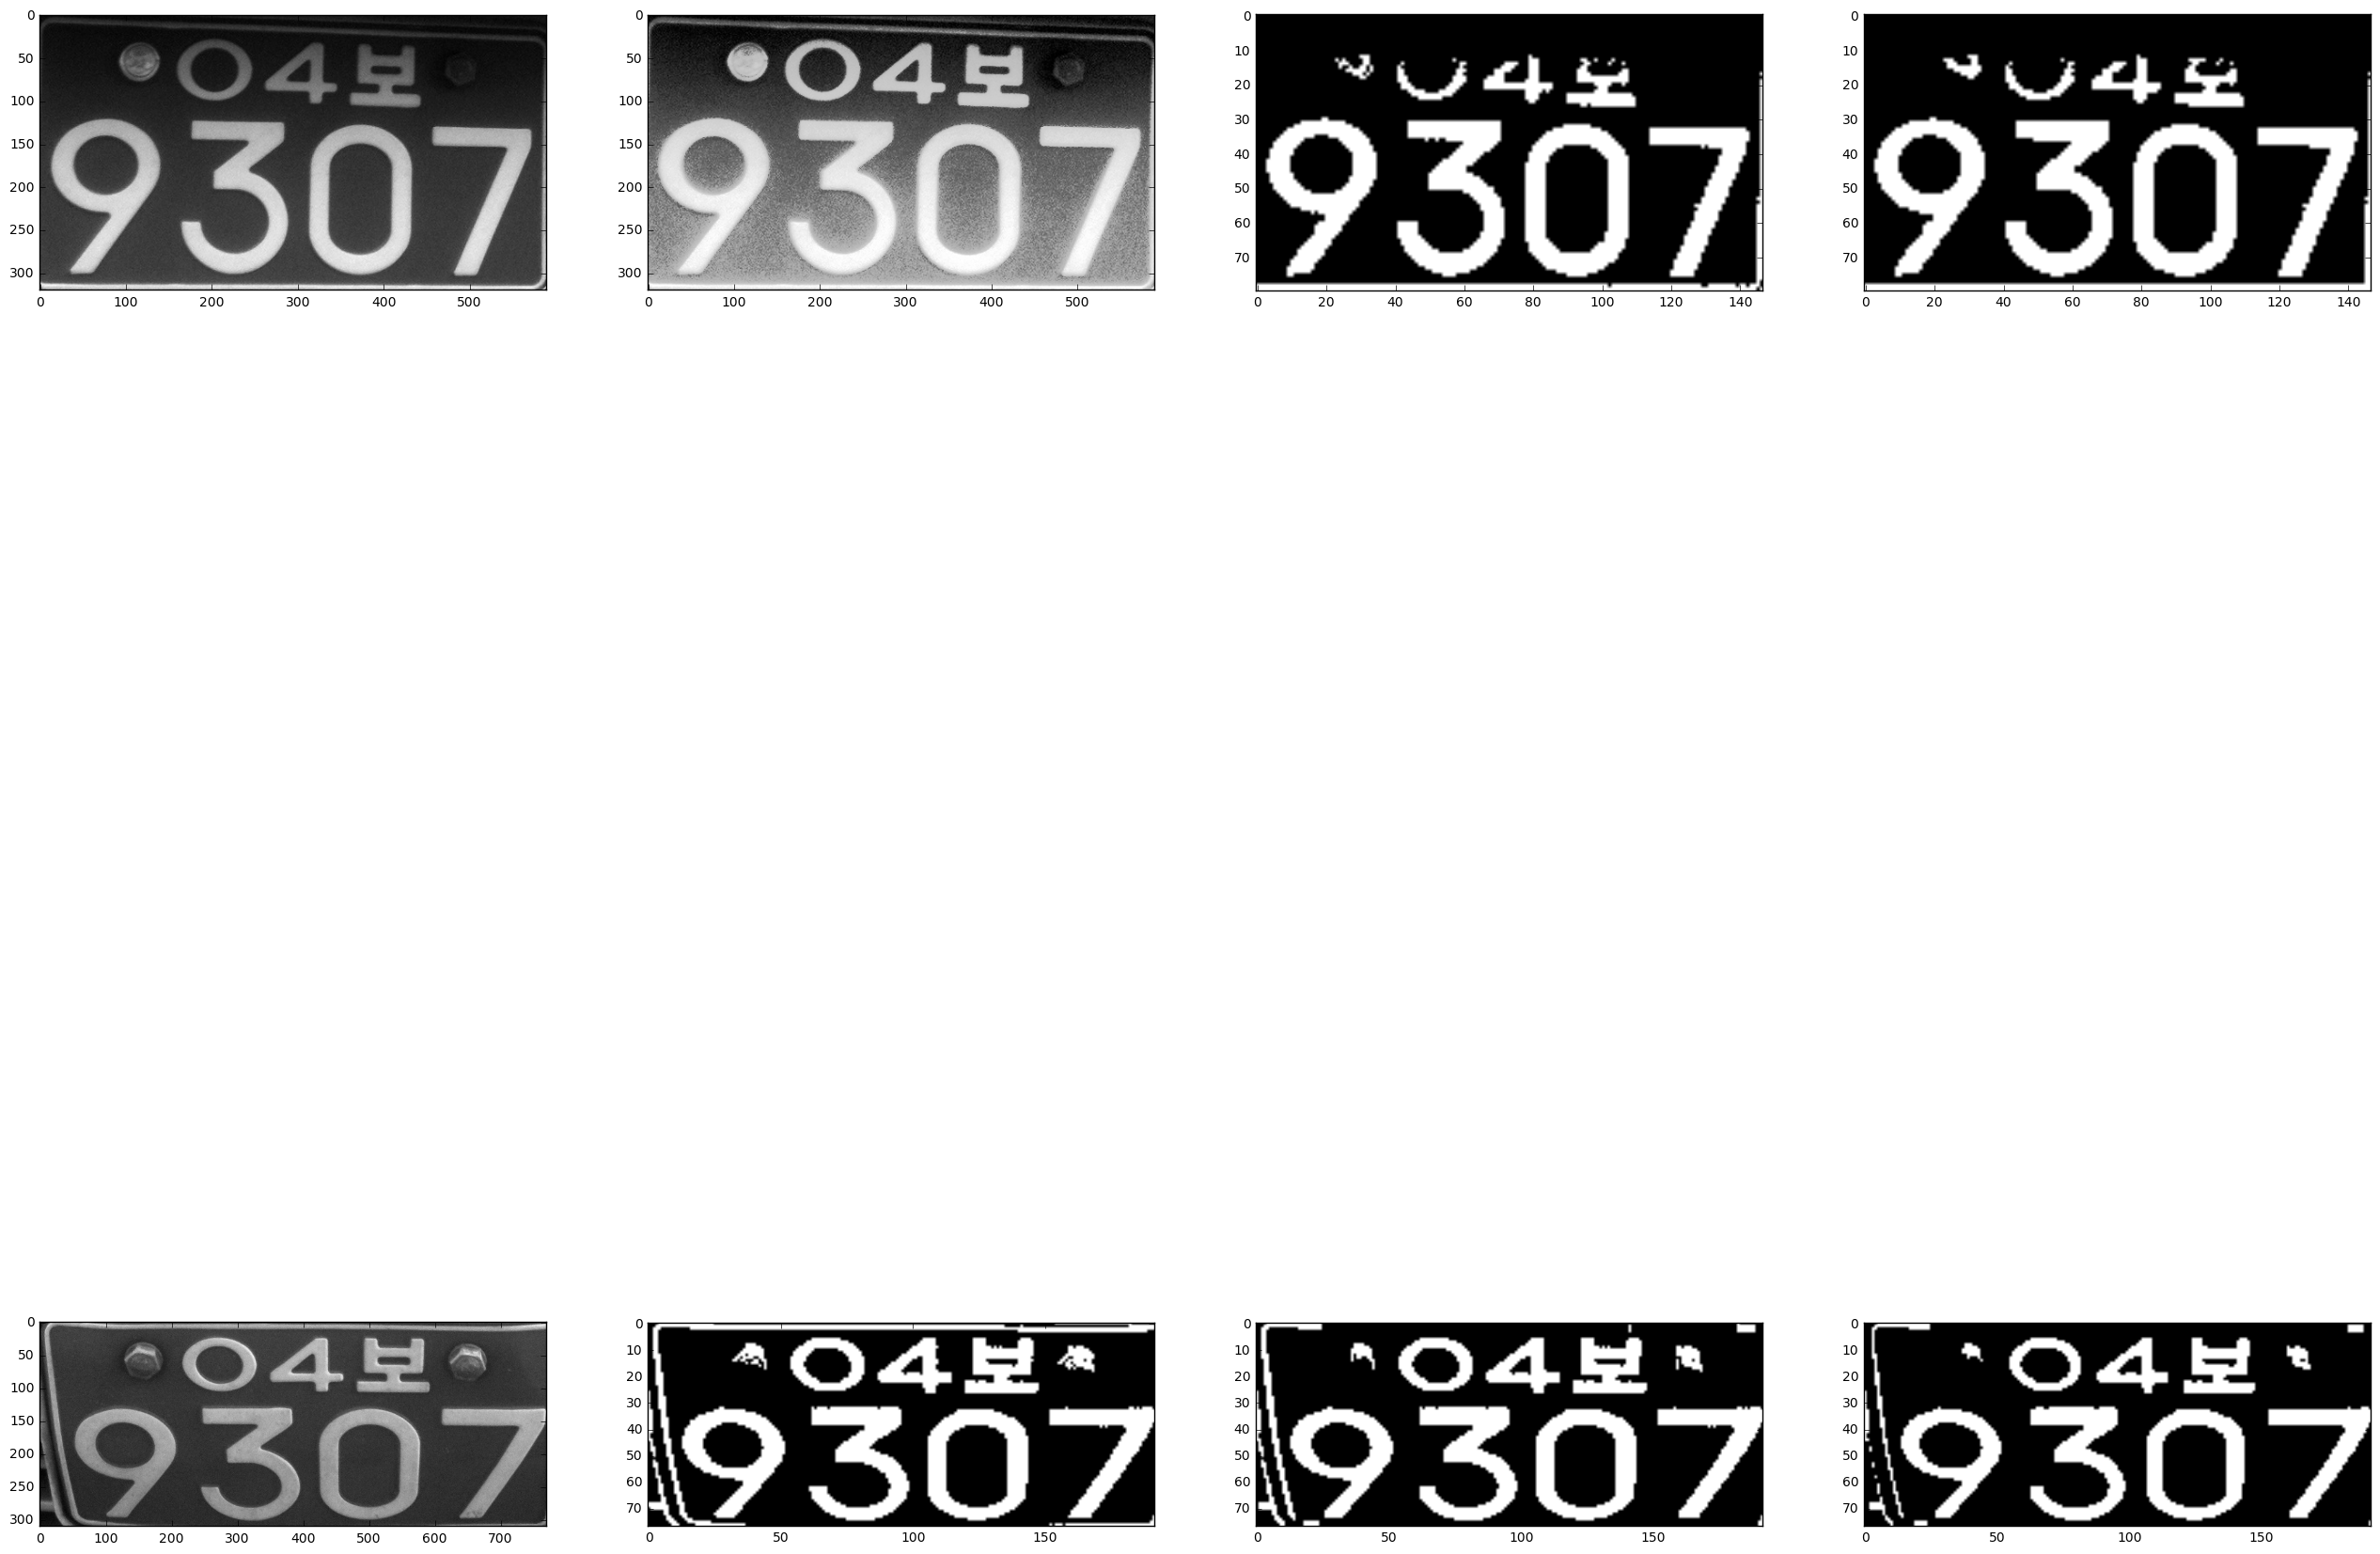

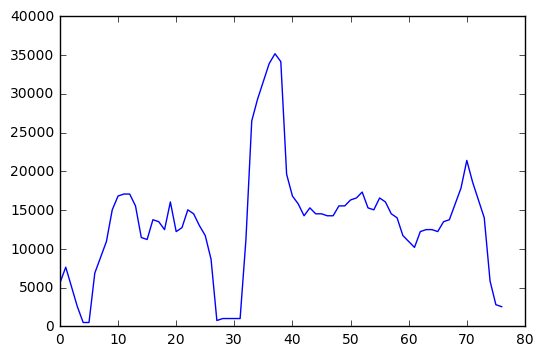

In [29]:
import cv2
import numpy as np
from PIL import Image
from pylab import *
import matplotlib.pyplot as plt

img=cv2.imread('car2.jpg',0)
crop2=img[650:970,700:1290]
row,col=crop2.shape

hist2 = cv2.equalizeHist(crop2)
imResize2=res = cv2.resize(hist2,(int(col/4), int(row/4)), interpolation = cv2.INTER_CUBIC)
ret,thresh2 = cv2.threshold(imResize2,191,255,cv2.THRESH_BINARY)

kernel2=np.ones((1,3),np.uint8)
erode=cv2.erode(thresh2,kernel2,iterations=1)
close2=cv2.morphologyEx(thresh2,cv2.MORPH_CLOSE,kernel2)

img=cv2.imread('car5.jpg',0)
crop5=img[780:1090,300:1070]
row,col=crop5.shape

#hist5 = cv2.equalizeHist(crop5)
imResize5=res = cv2.resize(crop5,(int(col/4), int(row/4)), interpolation = cv2.INTER_CUBIC)
ret,thresh5 = cv2.threshold(imResize5,63,255,cv2.THRESH_BINARY)

kernel5=np.ones((1,3),np.uint8)
close5=cv2.morphologyEx(thresh5,cv2.MORPH_CLOSE,kernel5)

kernel5=np.ones((3,1),np.uint8)
open5=cv2.morphologyEx(thresh5,cv2.MORPH_OPEN,kernel5)

kernel5=np.ones((1,2),np.uint8)
erode5=cv2.erode(open5,kernel5,iterations=1)

Vproj5=sum(open5,1)

fig, axs = subplots(2, 4, figsize=(32, 32))
axs[0][0].imshow(crop2)
axs[0][0].axis('on')
axs[0][1].imshow(hist2)
axs[0][1].axis('on')
axs[0][2].imshow(thresh2)
axs[0][2].axis('on')
axs[0][3].imshow(close2)
axs[0][3].axis('on')

axs[1][0].imshow(crop5)
axs[1][0].axis('on')
axs[1][1].imshow(thresh5)
axs[1][1].axis('on')
axs[1][2].imshow(open5)
axs[1][2].axis('on')
axs[1][3].imshow(erode5)
axs[1][3].axis('on')

gray()
show()       
#plt.plot(Vproj5)
#plt.show()

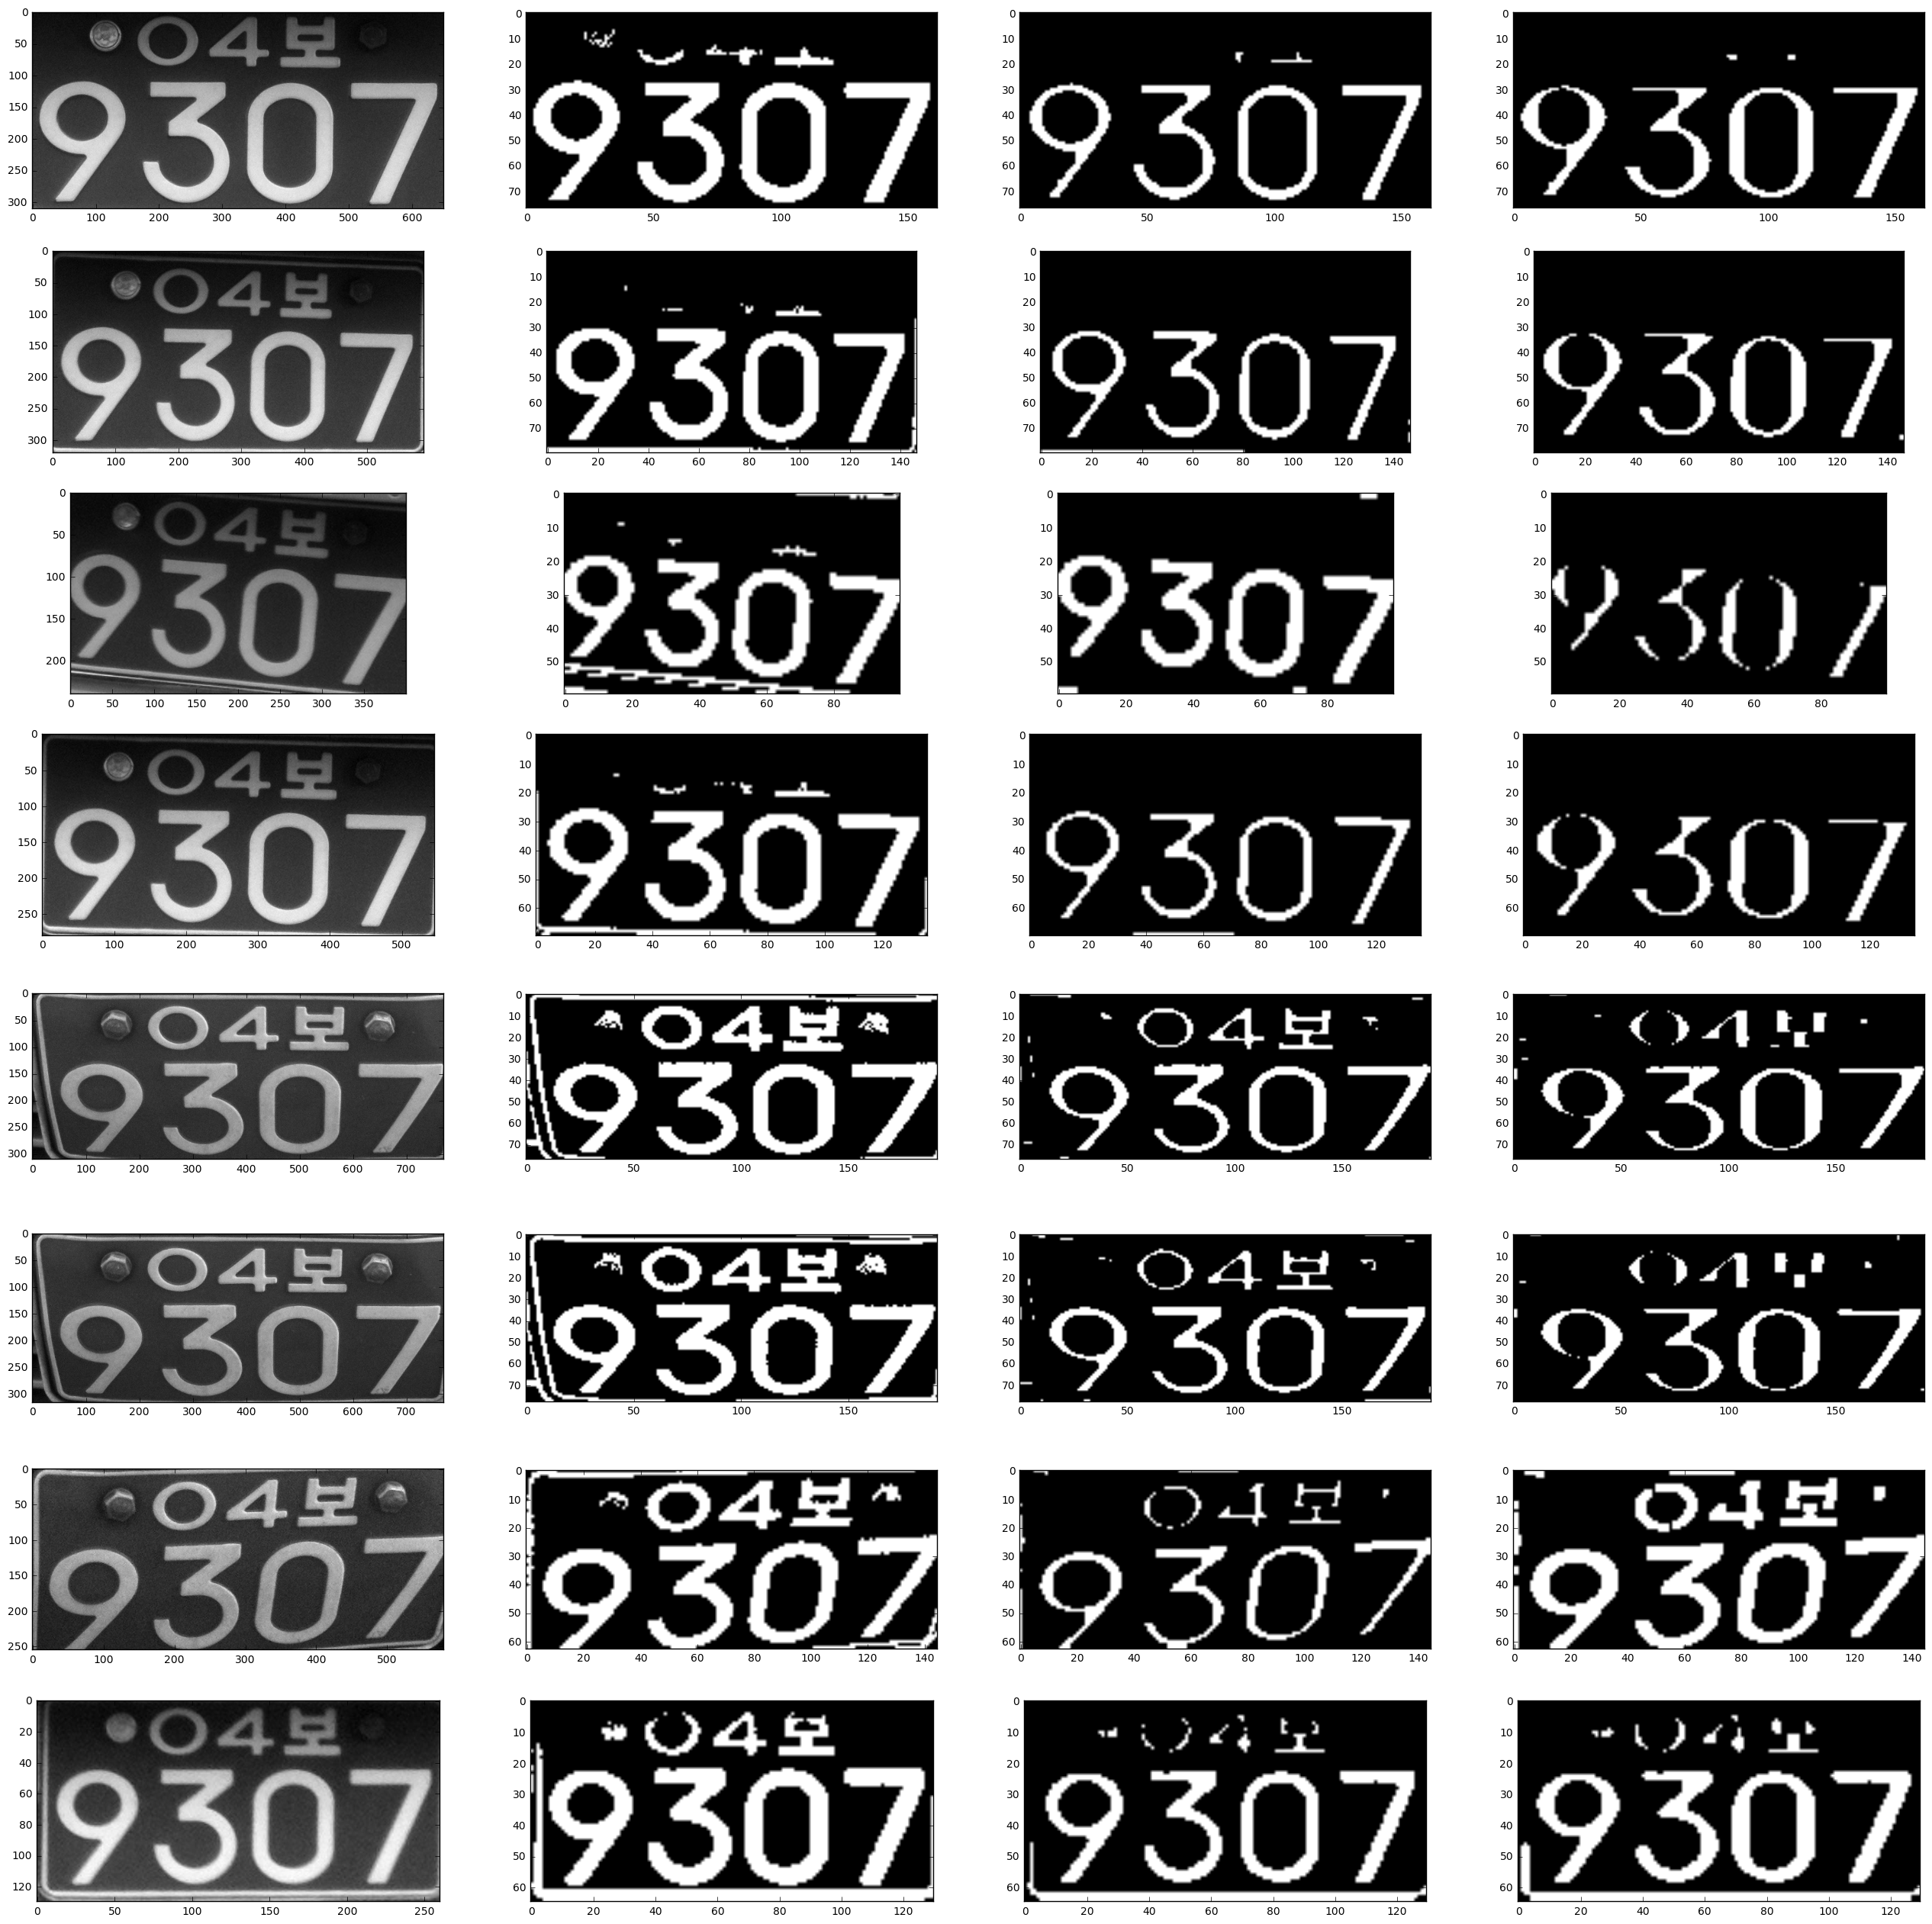

In [19]:
import cv2
import numpy as np
from PIL import Image
from pylab import *
import matplotlib.pyplot as plt

img=cv2.imread('car1.jpg',0)
crop1=img[720:1030,445:1095]
img=cv2.imread('car2.jpg',0)
crop2=img[650:970,700:1290]
img=cv2.imread('car3.jpg',0)
crop3=img[550:790,720:1120]
img=cv2.imread('car4.jpg',0)
crop4=img[550:830,870:1415]
img=cv2.imread('car5.jpg',0)
crop5=img[780:1090,300:1070]
img=cv2.imread('car6.jpg',0)
crop6=img[790:1105,280:1050]
img=cv2.imread('car7.jpg',0)
crop7=img[735:990,505:1085]
img=cv2.imread('car8.jpg',0)
crop8=img[765:895,1025:1285]

row,col=crop1.shape
imResize1= cv2.resize(crop1,(int(col/4), int(row/4)), interpolation = cv2.INTER_CUBIC)
row,col=crop2.shape
imResize2= cv2.resize(crop2,(int(col/4), int(row/4)), interpolation = cv2.INTER_CUBIC)
row,col=crop3.shape
imResize3= cv2.resize(crop3,(int(col/4), int(row/4)), interpolation = cv2.INTER_CUBIC)
row,col=crop4.shape
imResize4= cv2.resize(crop4,(int(col/4), int(row/4)), interpolation = cv2.INTER_CUBIC)
row,col=crop5.shape
imResize5= cv2.resize(crop5,(int(col/4), int(row/4)), interpolation = cv2.INTER_CUBIC)
row,col=crop6.shape
imResize6= cv2.resize(crop6,(int(col/4), int(row/4)), interpolation = cv2.INTER_CUBIC)
row,col=crop7.shape
imResize7= cv2.resize(crop7,(int(col/4), int(row/4)), interpolation = cv2.INTER_CUBIC)
row,col=crop8.shape
imResize8= cv2.resize(crop8,(int(col/2), int(row/2)), interpolation = cv2.INTER_CUBIC)

ret,input1 = cv2.threshold(imResize1,96,255,cv2.THRESH_BINARY)
ret,input2 = cv2.threshold(imResize2,96,255,cv2.THRESH_BINARY)
ret,input3 = cv2.threshold(imResize3,96,255,cv2.THRESH_BINARY)
ret,input4 = cv2.threshold(imResize4,96,255,cv2.THRESH_BINARY)
ret,input5 = cv2.threshold(imResize5,64,255,cv2.THRESH_BINARY)
ret,input6 = cv2.threshold(imResize6,64,255,cv2.THRESH_BINARY)
ret,input7 = cv2.threshold(imResize7,64,255,cv2.THRESH_BINARY)
ret,input8 = cv2.threshold(imResize8,96,255,cv2.THRESH_BINARY)

#car 1
kernel1=np.ones((3,3),np.uint8)
#erode47=cv2.erode(input2,kernel2,iterations=1)#hasil ok
#erode63=cv2.erode(input2,kernel2,iterations=1)
open1=cv2.morphologyEx(input1,cv2.MORPH_OPEN,kernel1)

open1=cv2.erode(open1,kernel1,iterations=1)
kernel1=np.ones((3,3),np.uint8)

tophat1=cv2.morphologyEx(input1,cv2.MORPH_TOPHAT,kernel1)
#tophat2=cv2.morphologyEx(input2,cv2.MORPH_BLACKHAT,kernel2)
kernel1=np.ones((5,1),np.uint8)
result1=cv2.erode(input1-tophat1,kernel1,iterations=1)

#car 2
kernel2=np.ones((3,3),np.uint8)
open2=cv2.morphologyEx(input2,cv2.MORPH_OPEN,kernel2)
open2=cv2.erode(open2,kernel2,iterations=1)
tophat2=cv2.morphologyEx(input2,cv2.MORPH_TOPHAT,kernel2)
kernel2=np.ones((5,1),np.uint8)
result2=cv2.erode(input2-tophat2,kernel2,iterations=1)

#car 3
kernel3=np.ones((3,3),np.uint8)
open3=cv2.morphologyEx(input3,cv2.MORPH_OPEN,kernel3)
#open3=cv2.erode(open3,kernel3,iterations=1)
tophat3=cv2.morphologyEx(input3,cv2.MORPH_TOPHAT,kernel3)
kernel3=np.ones((5,1),np.uint8)
result3=cv2.erode(input3-tophat3,kernel3,iterations=1)

#car 4
kernel4=np.ones((3,3),np.uint8)
open4=cv2.morphologyEx(input4,cv2.MORPH_OPEN,kernel4)
open4=cv2.erode(open4,kernel4,iterations=1)
tophat4=cv2.morphologyEx(input4,cv2.MORPH_TOPHAT,kernel4)
kernel4=np.ones((5,1),np.uint8)
result4=cv2.erode(input4-tophat4,kernel4,iterations=1)

#car 5
kernel5=np.ones((3,3),np.uint8)
open5=cv2.morphologyEx(input5,cv2.MORPH_OPEN,kernel5)
open5=cv2.erode(open5,kernel5,iterations=1)
tophat5=cv2.morphologyEx(input5,cv2.MORPH_TOPHAT,kernel5)
kernel5=np.ones((5,1),np.uint8)
result5=cv2.erode(input5-tophat5,kernel5,iterations=1)

#car 6
kernel6=np.ones((3,3),np.uint8)
open6=cv2.morphologyEx(input6,cv2.MORPH_OPEN,kernel6)
open6=cv2.erode(open6,kernel6,iterations=1)
tophat6=cv2.morphologyEx(input6,cv2.MORPH_TOPHAT,kernel6)
kernel6=np.ones((5,1),np.uint8)
result6=cv2.erode(input6-tophat6,kernel6,iterations=1)

#car 7
kernel7=np.ones((3,3),np.uint8)
open7=cv2.morphologyEx(input7,cv2.MORPH_OPEN,kernel7)
open7=cv2.erode(open7,kernel7,iterations=1)
tophat7=cv2.morphologyEx(input7,cv2.MORPH_TOPHAT,kernel7)
kernel7=np.ones((),np.uint8)
result7=cv2.erode(input7-tophat7,kernel7,iterations=1)

#car 8
kernel8=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
open8=cv2.morphologyEx(input8,cv2.MORPH_OPEN,kernel8)
open8=cv2.erode(open8,kernel8,iterations=1)
tophat8=cv2.morphologyEx(input8,cv2.MORPH_TOPHAT,kernel8)
kernel8=np.ones((3,1),np.uint8)
result8=cv2.erode(input8-tophat8,kernel8,iterations=1)


fig, axs = subplots(8, 4, figsize=(32, 32))
axs[0][0].imshow(crop1)
axs[0][0].axis('on')
axs[0][1].imshow(input1)
axs[0][1].axis('on')
axs[0][2].imshow(open1)
axs[0][2].axis('on')
axs[0][3].imshow(result1)
axs[0][3].axis('on')

axs[1][0].imshow(crop2)
axs[1][0].axis('on')
axs[1][1].imshow(input2)
axs[1][1].axis('on')
axs[1][2].imshow(open2)
axs[1][2].axis('on')
axs[1][3].imshow(result2)
axs[1][3].axis('on')

axs[2][0].imshow(crop3)
axs[2][0].axis('on')
axs[2][1].imshow(input3)
axs[2][1].axis('on')
axs[2][2].imshow(open3)
axs[2][2].axis('on')
axs[2][3].imshow(result3)
axs[2][3].axis('on')

axs[3][0].imshow(crop4)
axs[3][0].axis('on')
axs[3][1].imshow(input4)
axs[3][1].axis('on')
axs[3][2].imshow(open4)
axs[3][2].axis('on')
axs[3][3].imshow(result4)
axs[3][3].axis('on')

axs[4][0].imshow(crop5)
axs[4][0].axis('on')
axs[4][1].imshow(input5)
axs[4][1].axis('on')
axs[4][2].imshow(open5)
axs[4][2].axis('on')
axs[4][3].imshow(result5)
axs[4][3].axis('on')

axs[5][0].imshow(crop6)
axs[5][0].axis('on')
axs[5][1].imshow(input6)
axs[5][1].axis('on')
axs[5][2].imshow(open6)
axs[5][2].axis('on')
axs[5][3].imshow(result6)
axs[5][3].axis('on')

axs[6][0].imshow(crop7)
axs[6][0].axis('on')
axs[6][1].imshow(input7)
axs[6][1].axis('on')
axs[6][2].imshow(open7)
axs[6][2].axis('on')
axs[6][3].imshow(result7)
axs[6][3].axis('on')

axs[7][0].imshow(crop8)
axs[7][0].axis('on')
axs[7][1].imshow(input8)
axs[7][1].axis('on')
axs[7][2].imshow(open8)
axs[7][2].axis('on')
axs[7][3].imshow(result8)
axs[7][3].axis('on')

gray()
show() 

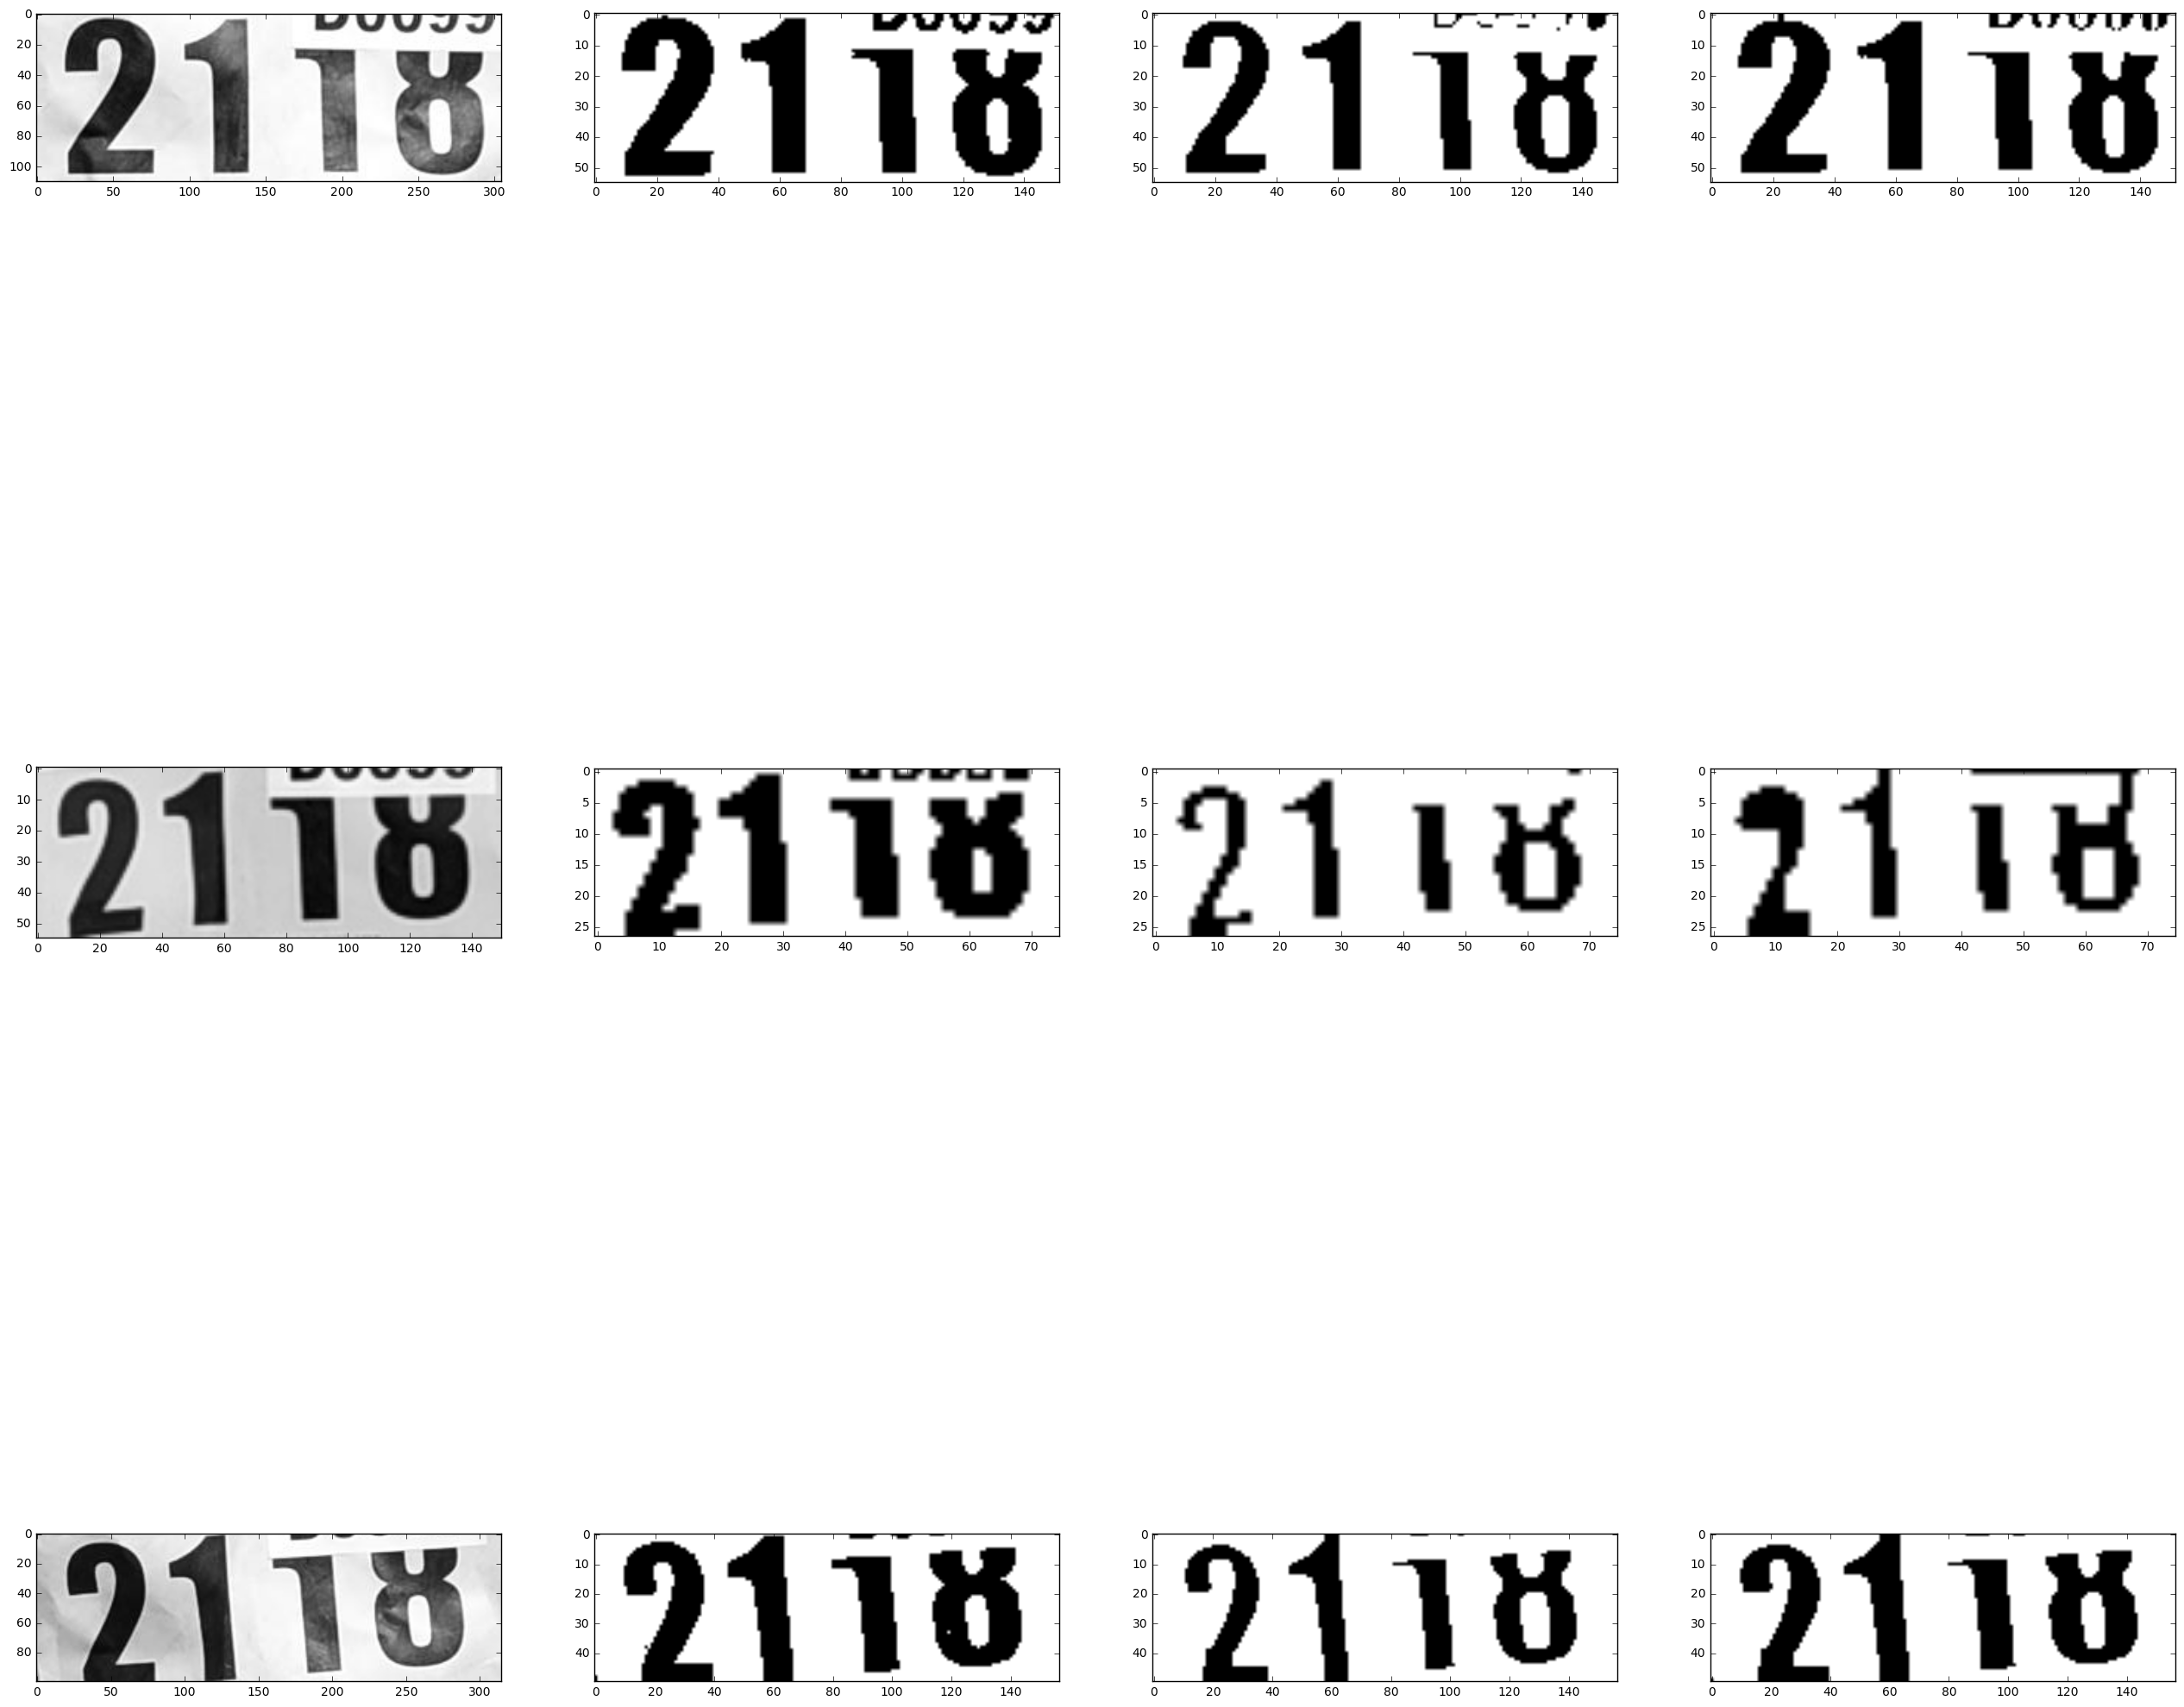

In [39]:
import cv2
import numpy as np
from PIL import Image
from pylab import *
import matplotlib.pyplot as plt

img=cv2.imread('marathon1.jpg',0)
cropm1=img[1445:1555,1095:1400]
img=cv2.imread('marathon2.jpg',0)
cropm2=img[895:950,605:755]
img=cv2.imread('marathon3.jpg',0)
cropm3=img[1580:1680,1105:1420]

row,col=cropm1.shape
imResizem1= cv2.resize(cropm1,(int(col/2), int(row/2)), interpolation = cv2.INTER_CUBIC)
row,col=cropm2.shape
imResizem2= cv2.resize(cropm2,(int(col/2), int(row/2)), interpolation = cv2.INTER_CUBIC)
row,col=cropm3.shape
imResizem3= cv2.resize(cropm3,(int(col/2), int(row/2)), interpolation = cv2.INTER_CUBIC)

ret,inputm1 = cv2.threshold(imResizem1,192,255,cv2.THRESH_BINARY)
ret,inputm2 = cv2.threshold(imResizem2,160,255,cv2.THRESH_BINARY)
ret,inputm3 = cv2.threshold(imResizem3,160,255,cv2.THRESH_BINARY)

#marathon 1
#kernel1=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel1=np.ones((3,3),np.uint8)
openm1=cv2.morphologyEx(inputm1,cv2.MORPH_OPEN,kernel1)
openm1=cv2.dilate(openm1,kernel1,iterations=1)
tophatm1=cv2.morphologyEx(inputm1,cv2.MORPH_TOPHAT,kernel8)
kernel1=np.ones((3,1),np.uint8)
resultm1=cv2.dilate(inputm1-tophatm1,kernel1,iterations=1)

#marathon 2
#kernel2=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel2=np.ones((3,3),np.uint8)
#openm2=cv2.morphologyEx(inputm2,cv2.MORPH_OPEN,kernel2)
openm2=cv2.dilate(inputm2,kernel2,iterations=1)
tophatm2=cv2.morphologyEx(inputm2,cv2.MORPH_TOPHAT,kernel2)
kernel2=np.ones((3,3),np.uint8)
resultm2=cv2.dilate(inputm2-tophatm2,kernel2,iterations=1)

#marathon 3
#kernel3=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel3=np.ones((3,3),np.uint8)
openm3=cv2.morphologyEx(inputm3,cv2.MORPH_OPEN,kernel3)
openm3=cv2.dilate(openm3,kernel3,iterations=1)
tophatm3=cv2.morphologyEx(inputm3,cv2.MORPH_TOPHAT,kernel3)
kernel3=np.ones((3,1),np.uint8)
resultm3=cv2.dilate(inputm3-tophatm3,kernel3,iterations=1)

fig, axs = subplots(3, 4, figsize=(32, 32))
axs[0][0].imshow(cropm1)
axs[0][0].axis('on')
axs[0][1].imshow(inputm1)
axs[0][1].axis('on')
axs[0][2].imshow(openm1)
axs[0][2].axis('on')
axs[0][3].imshow(resultm1)
axs[0][3].axis('on')

axs[1][0].imshow(cropm2)
axs[1][0].axis('on')
axs[1][1].imshow(inputm2)
axs[1][1].axis('on')
axs[1][2].imshow(openm2)
axs[1][2].axis('on')
axs[1][3].imshow(resultm2)
axs[1][3].axis('on')

axs[2][0].imshow(cropm3)
axs[2][0].axis('on')
axs[2][1].imshow(inputm3)
axs[2][1].axis('on')
axs[2][2].imshow(openm3)
axs[2][2].axis('on')
axs[2][3].imshow(resultm3)
axs[2][3].axis('on')
gray()
show() 